In [ ]:
#%%

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#%%

# Carrega o arquivo CSV em um DataFrame
df = pd.read_csv('datasets\csv\DlCtrlSinr.csv')

df

Time  CellId  RNTI  BWPId  SINR(dB)
0      0.000071       2     0      0 -17.04800
1      0.000071       2     0      0 -17.46470
2      0.000071       2     0      0  -3.08629
3      0.000071       2     0      0 -10.45480
4      0.000071       2     0      0 -27.97850
...         ...     ...   ...    ...       ...
52875  5.999070       2     5      0  17.96740
52876  5.999070       2     4      0  21.41710
52877  5.999070       2     3      0  13.53070
52878  5.999070       2     2      0  29.86850
52879  5.999070       2     1      0  22.87020

[52880 rows x 5 columns]

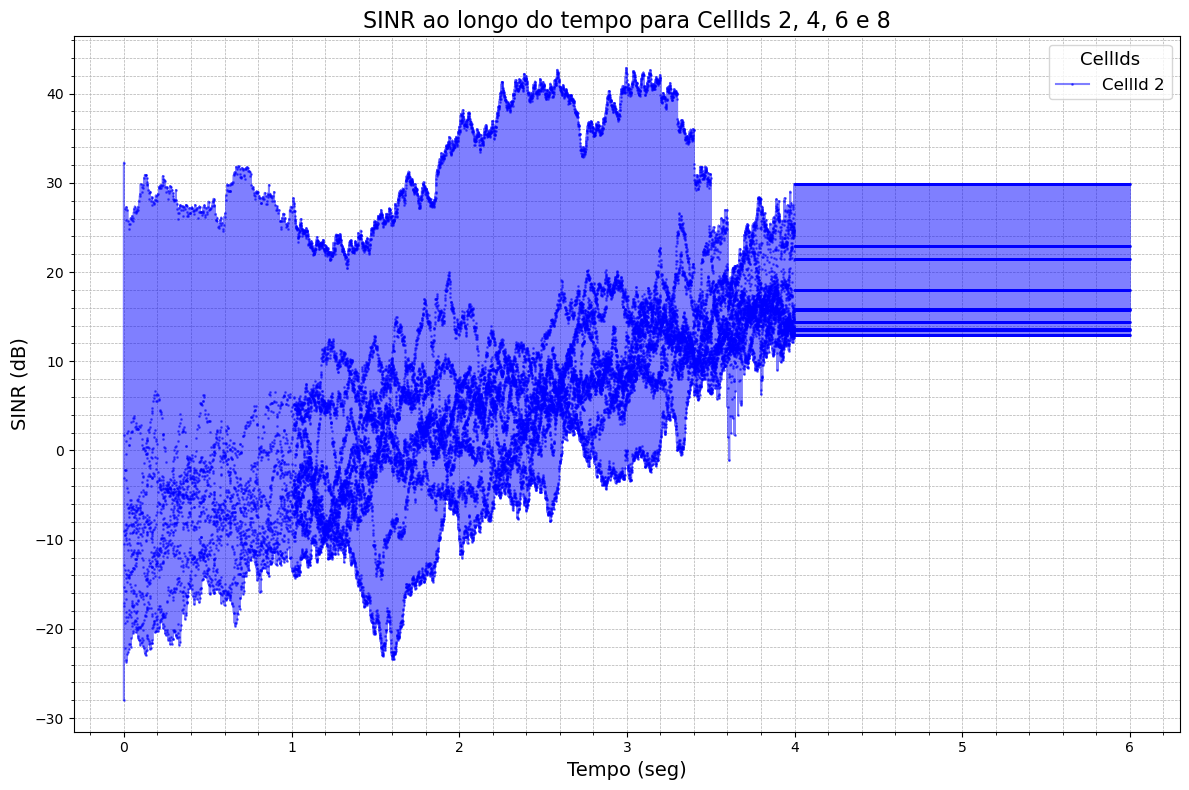

In [ ]:
# %%

# Função para filtrar DataFrame por CellId
def filter_by_CellId(df, CellId_values):
    return {CellId: df[df['CellId'] == CellId] for CellId in CellId_values}

CellId_values = [2]  # Apenas os valores de CellId 2, 4, 6 e 8
filtered_dfs = filter_by_CellId(df, CellId_values)

# Configurações do gráfico
plt.figure(figsize=(12, 8))

colors = ['b', 'g', 'r', 'c']  # Define cores para cada usuário
markers = ['o', 's', 'o', 's']  # Define marcadores para cada usuário
linestyles = ['-', '--', '--', '--']  # Define estilos de linha para cada usuário

# Plota o gráfico de SINR ao longo do tempo para cada CellId
for i, CellId in enumerate(CellId_values):
    user_df = filtered_dfs[CellId]
    plt.plot(user_df['Time'], user_df['SINR(dB)'], label=f'CellId {CellId}', color=colors[i], marker=markers[i], linestyle=linestyles[i], markersize=1, linewidth=1.5, alpha=0.5)  # Define alpha para 0.5 para translucidez

plt.title('SINR ao longo do tempo para CellIds 2, 4, 6 e 8', fontsize=16)
plt.xlabel('Tempo (seg)', fontsize=14)
plt.ylabel('SINR (dB)', fontsize=14)
plt.legend(title='CellIds', fontsize=12, title_fontsize='13')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

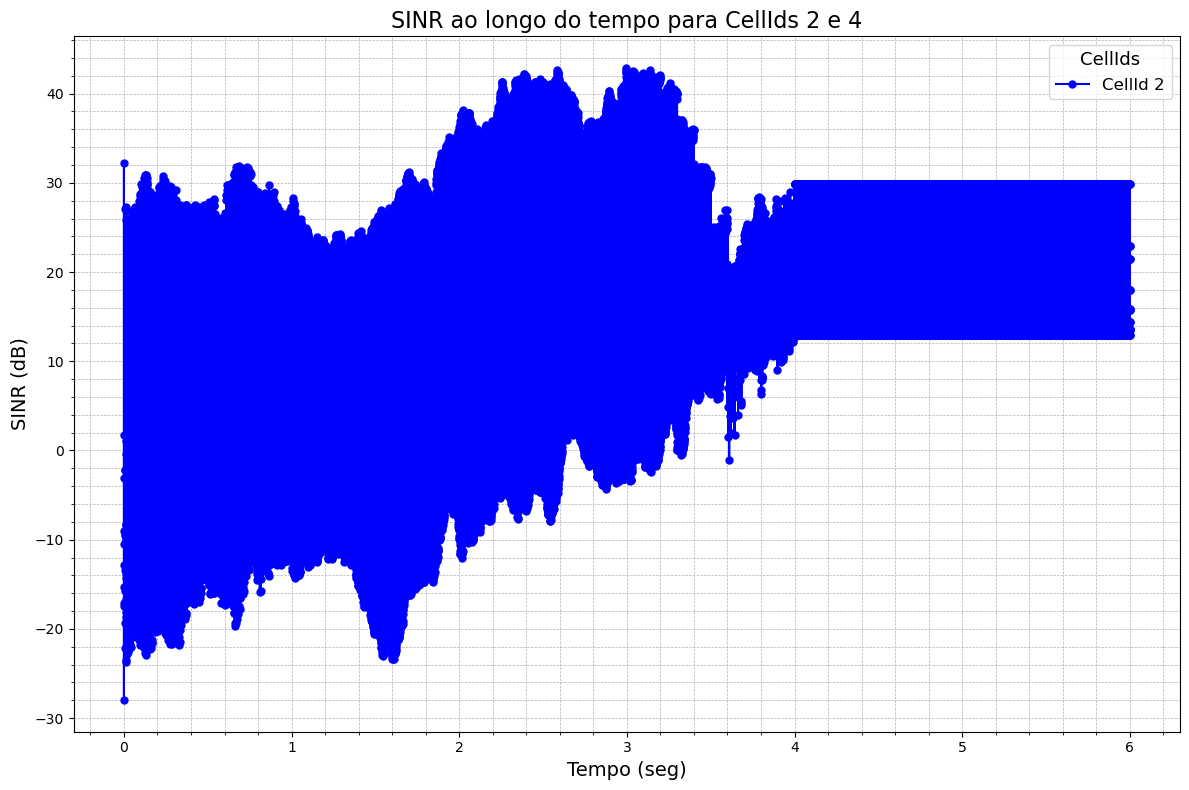

In [ ]:
#%%

# Gráfico limpo
plt.figure(figsize=(12, 8))

colors = ['b', 'g', 'r', 'c']  # Define cores para cada usuário
markers = ['o', 's', 'd', '^']  # Define marcadores para cada usuário
linestyles = ['-', '--', '-.', ':']  # Define estilos de linha para cada usuário

# Plota o gráfico de SINR ao longo do tempo para cada CellId
for i, CellId in enumerate(CellId_values):
    user_df = filtered_dfs[CellId]
    plt.plot(user_df['Time'], user_df['SINR(dB)'], label=f'CellId {CellId}', color=colors[i], marker=markers[i], linestyle=linestyles[i], markersize=5, linewidth=1.5)

plt.title('SINR ao longo do tempo para CellIds 2 e 4', fontsize=16)
plt.xlabel('Tempo (seg)', fontsize=14)
plt.ylabel('SINR (dB)', fontsize=14)
plt.legend(title='CellIds', fontsize=12, title_fontsize='13')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

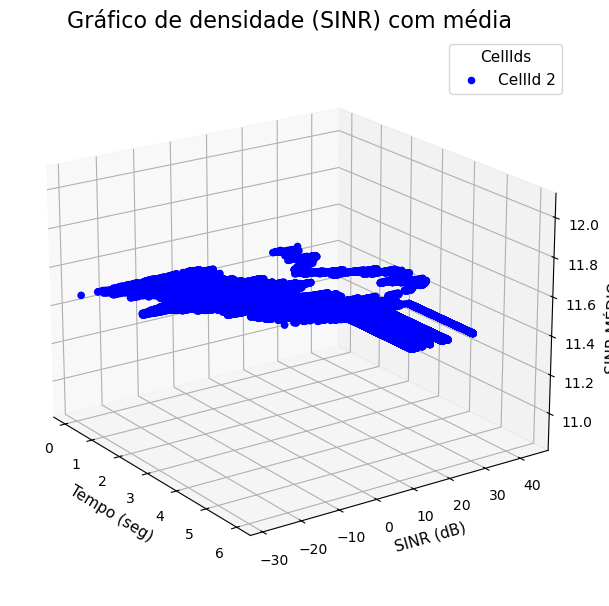

In [ ]:
#%%

# Gráfico de densidade 3D para cada CellId

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plota o gráfico de densidade 3D para cada CellId
for i, CellId in enumerate(CellId_values):
    user_df = filtered_dfs[CellId]
    x = user_df['Time']
    y = user_df['SINR(dB)']
    z_stat = user_df['SINR(dB)'].mean()  # Calcula a média do SINR para cada CellId
    z = np.zeros_like(x) + z_stat  # Usa a média do SINR como valor do eixo z
    
    ax.scatter(x, y, z, label=f'CellId {CellId}', color=colors[i % len(colors)], marker=markers[i % len(markers)], alpha=0.1)  # Define alpha para 0.1 para mais translucidez

# Adiciona a legenda separadamente para evitar transparência
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_alpha(1.0)  # Define alpha para 1.0 para itens da legenda

ax.set_title('Gráfico de densidade (SINR) com média', fontsize=16)
ax.set_xlabel('Tempo (seg)', fontsize=11)
ax.set_ylabel('SINR (dB)', fontsize=11)
ax.legend(handles, labels, title='CellIds', fontsize=11, title_fontsize='11')
ax.view_init(elev=20., azim=-35)  # Ajusta a elevação e o ângulo para melhor visualização
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)  # Ajusta o gráfico para fazer espaço para o rótulo do eixo z
ax.set_zlabel('SINR MÉDIO', fontsize=11)
plt.show()

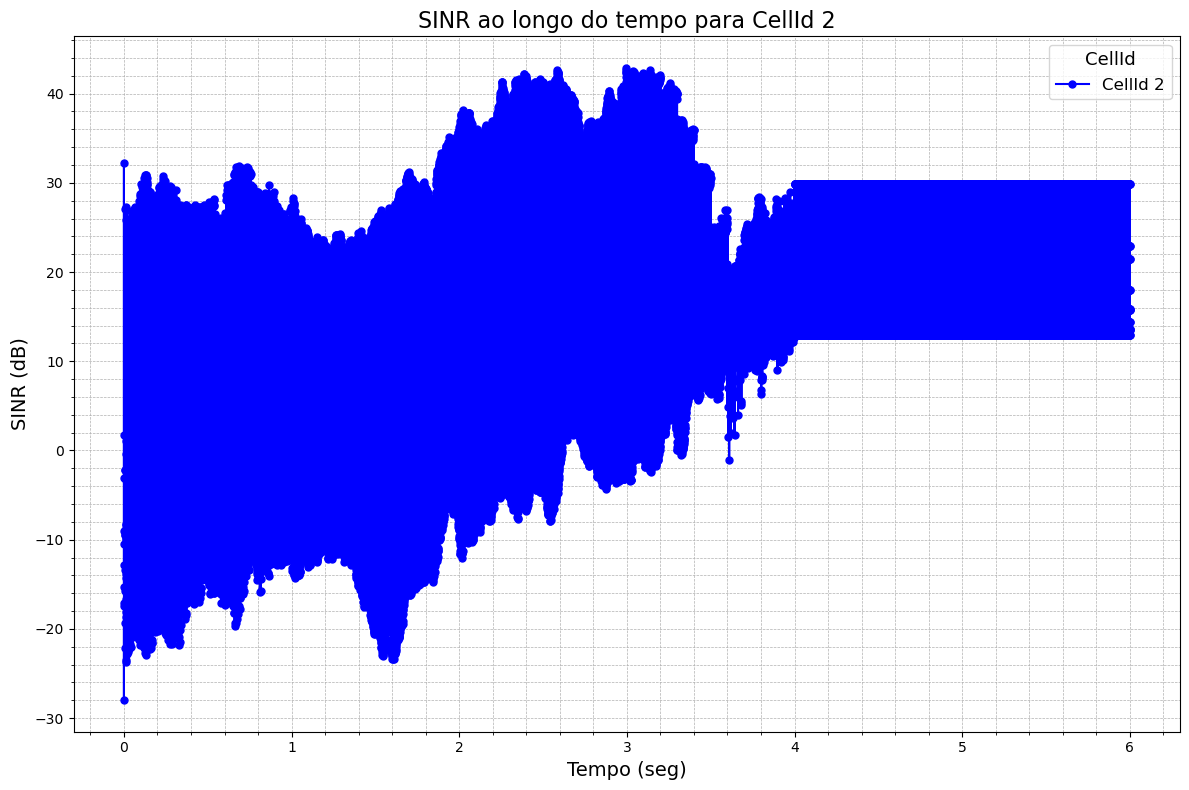

In [ ]:
#%%

# Gráficos separados para cada CellId
for i, CellId in enumerate(CellId_values):
    plt.figure(figsize=(12, 8))
    user_df = filtered_dfs[CellId]
    plt.plot(user_df['Time'], user_df['SINR(dB)'], label=f'CellId {CellId}', color=colors[i % len(colors)], marker=markers[i % len(markers)], linestyle=linestyles[i % len(linestyles)], markersize=5, linewidth=1.5)
    
    plt.title(f'SINR ao longo do tempo para CellId {CellId}', fontsize=16)
    plt.xlabel('Tempo (seg)', fontsize=14)
    plt.ylabel('SINR (dB)', fontsize=14)
    plt.legend(title='CellId', fontsize=12, title_fontsize='13')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.tight_layout()
    plt.show()

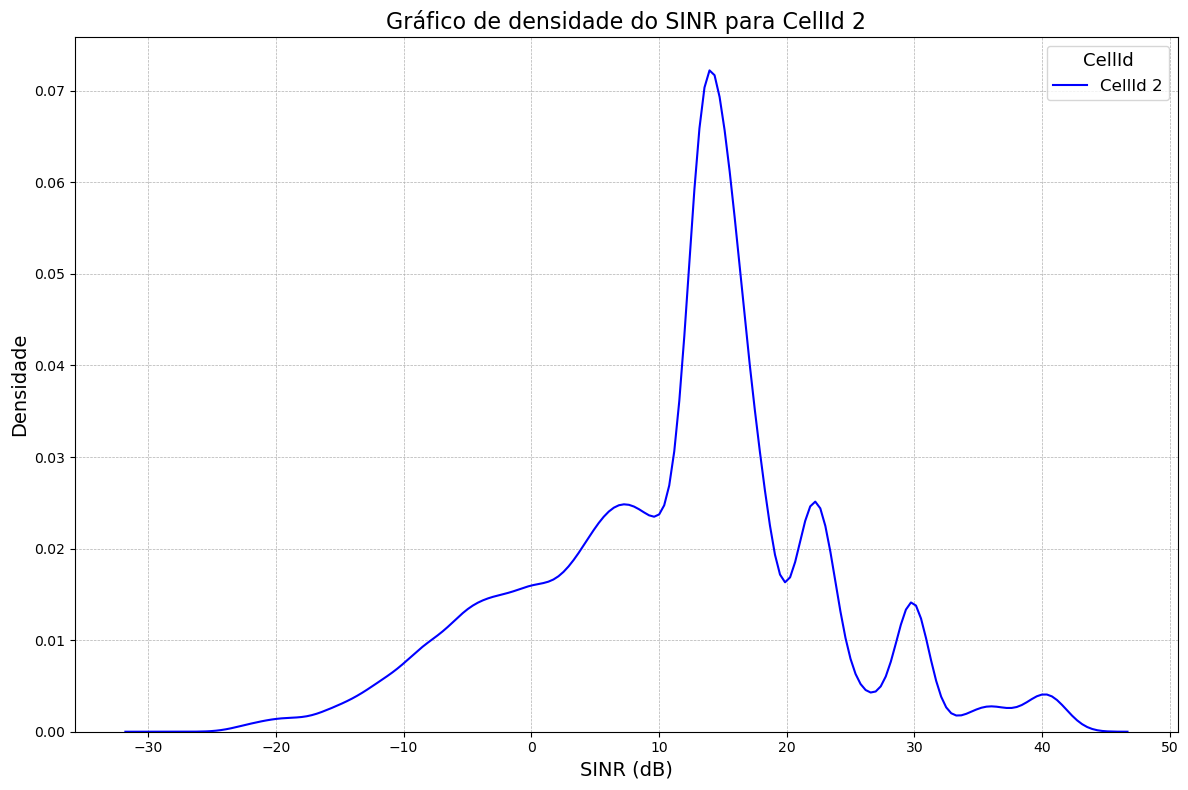

In [ ]:
#%%

# Gráfico de densidade para cada CellId
for i, CellId in enumerate(CellId_values):
    plt.figure(figsize=(12, 8))
    user_df = filtered_dfs[CellId]
    sns.kdeplot(user_df['SINR(dB)'], label=f'CellId {CellId}', color=colors[i % len(colors)], linestyle=linestyles[i % len(linestyles)], linewidth=1.5)
    
    plt.title(f'Gráfico de densidade do SINR para CellId {CellId}', fontsize=16)
    plt.xlabel('SINR (dB)', fontsize=14)
    plt.ylabel('Densidade', fontsize=14)
    plt.legend(title='CellId', fontsize=12, title_fontsize='13')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

TypeError: 'Axes' object is not subscriptable

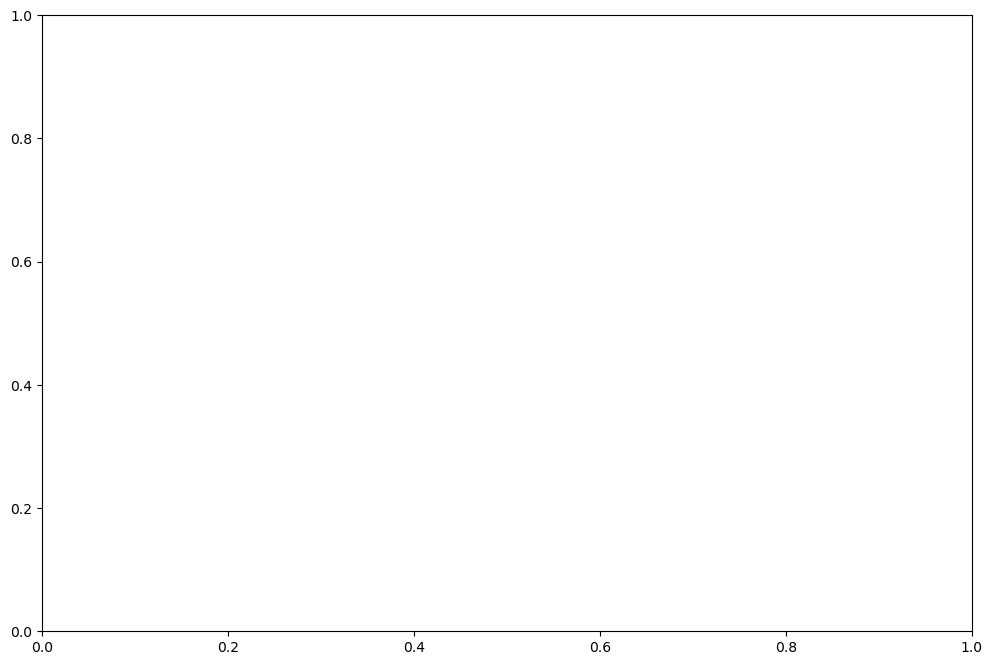

In [ ]:
#%%

# Gráfico de mapa de calor usando seaborn
fig, axs = plt.subplots(len(CellId_values), 1, figsize=(12, 8), sharex=True)

# Plota o gráfico de mapa de calor para cada CellId
for i, CellId in enumerate(CellId_values):
    user_df = filtered_dfs[CellId]
    
    # Remove duplicatas agregando pela média
    user_df = user_df.groupby(['Time', 'CellId'], as_index=False).mean()
    
    pivot_table = user_df.pivot(index="Time", columns="CellId", values="SINR(dB)")
    sns.heatmap(pivot_table, ax=axs[i], cmap="YlGnBu", cbar=True)
    
    axs[i].set_title(f'Mapa de calor do SINR para CellId {CellId}', fontsize=14)
    axs[i].set_ylabel('Tempo (seg)', fontsize=12)

axs[-1].set_xlabel('CellId', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# %%

# Agrupa o DataFrame por CellId e descreve as estatísticas do SINR
grouped_df = df.groupby('CellId')['SINR(dB)'].describe()
grouped_df

count       mean        std      min      25%      50%      75%  \
CellId                                                                      
2       52880.0  11.463932  11.143618 -27.9785  4.86831  13.5307  17.1419   

            max  
CellId           
2       42.8789

In [ ]:
# %%

# Calcula a diferença percentual média para cada CellId
average_percentage_diff = {CellId: np.mean(list(rnti_diff.values())) for CellId, rnti_diff in percentage_diff.items()}

# Plota a diferença percentual média para cada CellId
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(average_percentage_diff.keys(), average_percentage_diff.values(), color=[colors[CellId_values.index(CellId) % len(colors)] for CellId in average_percentage_diff.keys()], edgecolor='black')

# Adiciona rótulos de valor no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom' if yval >= 0 else 'top', fontsize=10, color='black')

ax.axhline(0, color='black', linewidth=0.8)  # Adiciona uma linha horizontal em y=0
ax.set_ylim(min(average_percentage_diff.values()) - 5, max(average_percentage_diff.values()) + 5)  # Ajusta os limites do eixo y com uma margem
ax.set_title('Diferença percentual média no SINR para cada CellId', fontsize=14)
ax.set_ylabel('Diferença percentual média (%)', fontsize=12)
ax.set_xlabel('CellId', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5, axis='y')
ax.set_xticks(list(average_percentage_diff.keys()))
ax.set_xticklabels([int(cellid) for cellid in average_percentage_diff.keys()], fontsize=12)
plt.tight_layout()
plt.show()

NameError: name 'percentage_diff' is not defined

In [ ]:
#%%

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#%%

# Carrega o arquivo CSV em um DataFrame
df = pd.read_csv('datasets\csv\DlCtrlSinr.csv')

df

Time  CellId  RNTI  BWPId  SINR(dB)
0      0.000071       2     0      0 -17.04800
1      0.000071       2     0      0 -17.46470
2      0.000071       2     0      0  -3.08629
3      0.000071       2     0      0 -10.45480
4      0.000071       2     0      0 -27.97850
...         ...     ...   ...    ...       ...
52875  5.999070       2     5      0  17.96740
52876  5.999070       2     4      0  21.41710
52877  5.999070       2     3      0  13.53070
52878  5.999070       2     2      0  29.86850
52879  5.999070       2     1      0  22.87020

[52880 rows x 5 columns]

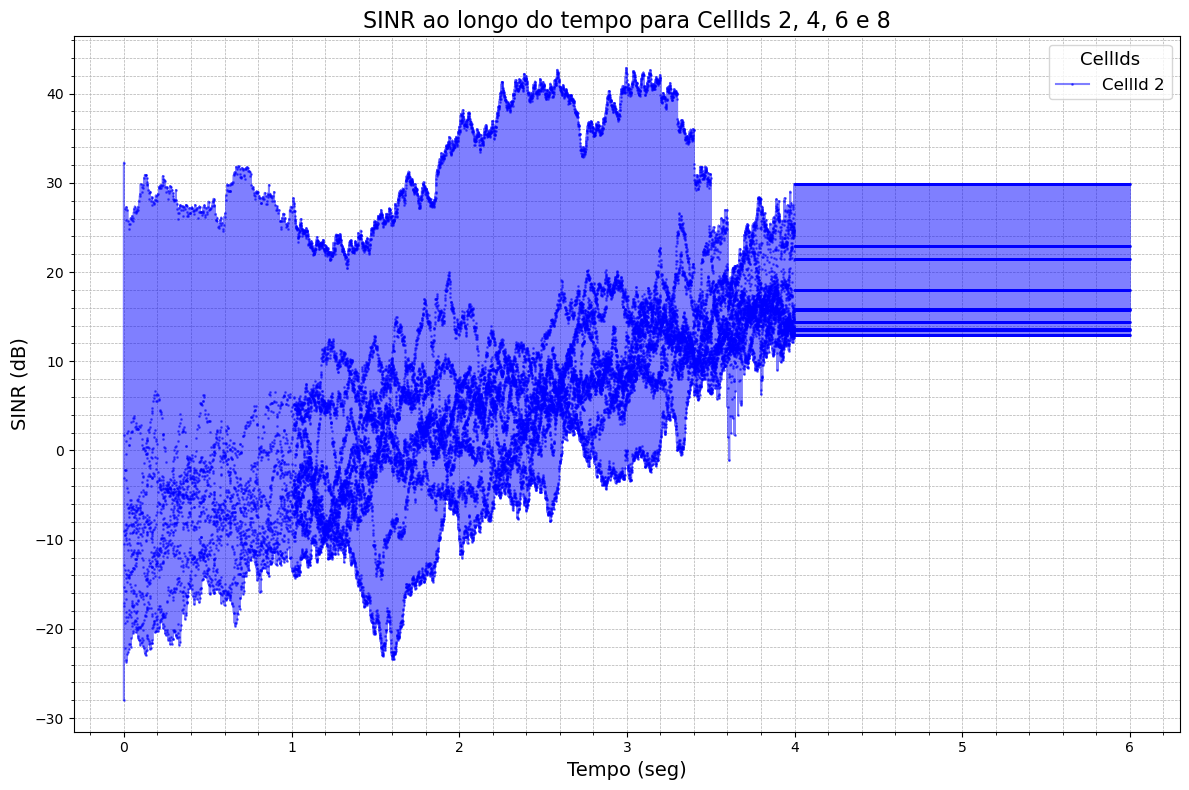

In [ ]:
# %%

# Função para filtrar DataFrame por CellId
def filter_by_CellId(df, CellId_values):
    return {CellId: df[df['CellId'] == CellId] for CellId in CellId_values}

CellId_values = [2]  # Apenas os valores de CellId 2, 4, 6 e 8
filtered_dfs = filter_by_CellId(df, CellId_values)

# Configurações do gráfico
plt.figure(figsize=(12, 8))

colors = ['b', 'g', 'r', 'c']  # Define cores para cada usuário
markers = ['o', 's', 'o', 's']  # Define marcadores para cada usuário
linestyles = ['-', '--', '--', '--']  # Define estilos de linha para cada usuário

# Plota o gráfico de SINR ao longo do tempo para cada CellId
for i, CellId in enumerate(CellId_values):
    user_df = filtered_dfs[CellId]
    plt.plot(user_df['Time'], user_df['SINR(dB)'], label=f'CellId {CellId}', color=colors[i], marker=markers[i], linestyle=linestyles[i], markersize=1, linewidth=1.5, alpha=0.5)  # Define alpha para 0.5 para translucidez

plt.title('SINR ao longo do tempo para CellIds 2, 4, 6 e 8', fontsize=16)
plt.xlabel('Tempo (seg)', fontsize=14)
plt.ylabel('SINR (dB)', fontsize=14)
plt.legend(title='CellIds', fontsize=12, title_fontsize='13')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

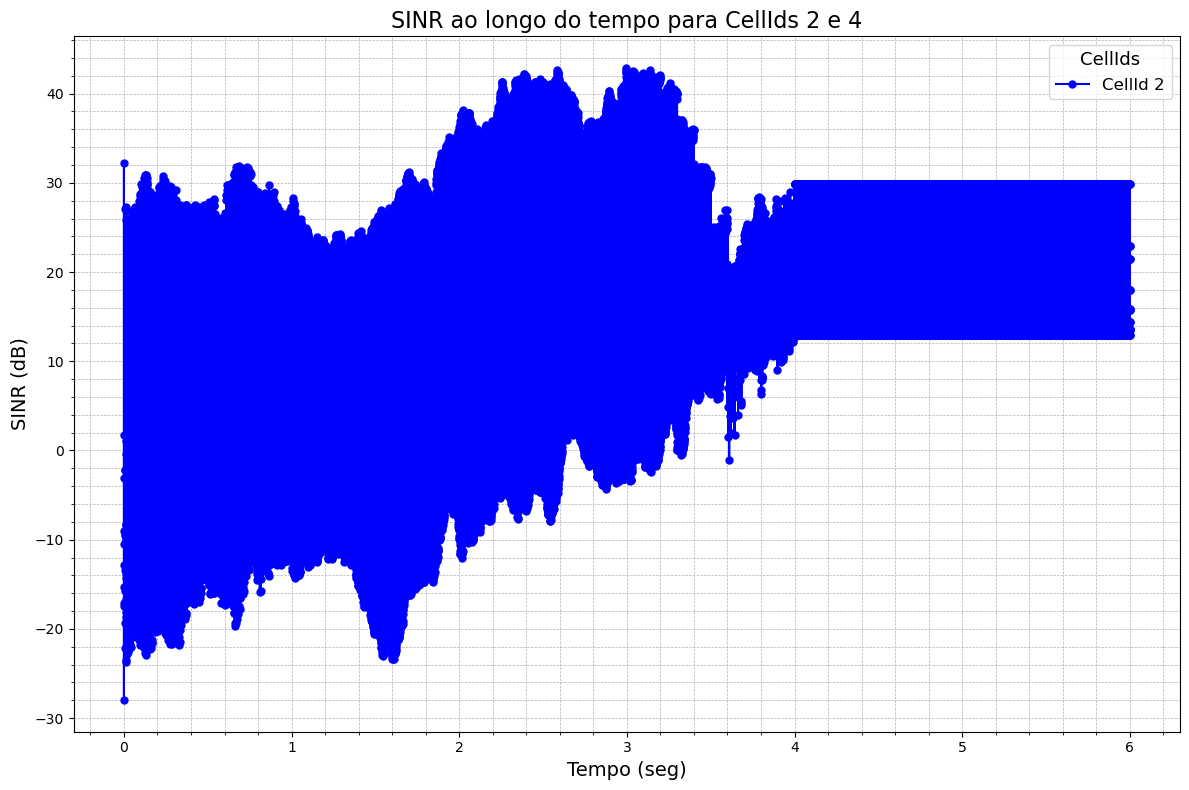

In [ ]:
#%%

# Gráfico limpo
plt.figure(figsize=(12, 8))

colors = ['b', 'g', 'r', 'c']  # Define cores para cada usuário
markers = ['o', 's', 'd', '^']  # Define marcadores para cada usuário
linestyles = ['-', '--', '-.', ':']  # Define estilos de linha para cada usuário

# Plota o gráfico de SINR ao longo do tempo para cada CellId
for i, CellId in enumerate(CellId_values):
    user_df = filtered_dfs[CellId]
    plt.plot(user_df['Time'], user_df['SINR(dB)'], label=f'CellId {CellId}', color=colors[i], marker=markers[i], linestyle=linestyles[i], markersize=5, linewidth=1.5)

plt.title('SINR ao longo do tempo para CellIds 2 e 4', fontsize=16)
plt.xlabel('Tempo (seg)', fontsize=14)
plt.ylabel('SINR (dB)', fontsize=14)
plt.legend(title='CellIds', fontsize=12, title_fontsize='13')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.tight_layout()
plt.show()

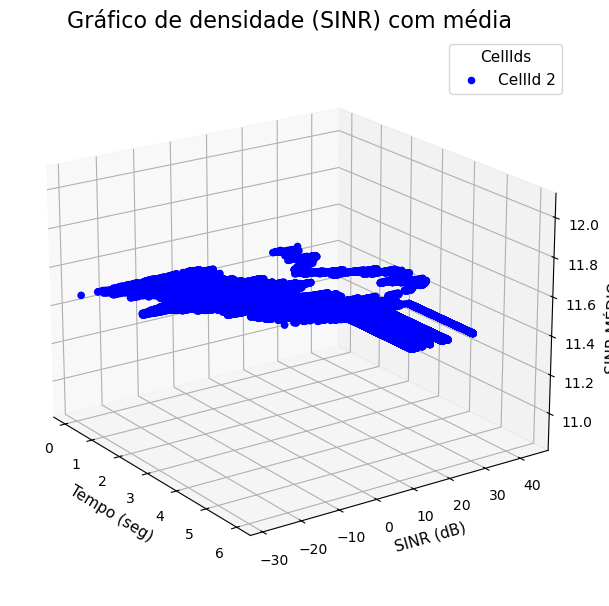

In [ ]:
#%%

# Gráfico de densidade 3D para cada CellId

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plota o gráfico de densidade 3D para cada CellId
for i, CellId in enumerate(CellId_values):
    user_df = filtered_dfs[CellId]
    x = user_df['Time']
    y = user_df['SINR(dB)']
    z_stat = user_df['SINR(dB)'].mean()  # Calcula a média do SINR para cada CellId
    z = np.zeros_like(x) + z_stat  # Usa a média do SINR como valor do eixo z
    
    ax.scatter(x, y, z, label=f'CellId {CellId}', color=colors[i % len(colors)], marker=markers[i % len(markers)], alpha=0.1)  # Define alpha para 0.1 para mais translucidez

# Adiciona a legenda separadamente para evitar transparência
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_alpha(1.0)  # Define alpha para 1.0 para itens da legenda

ax.set_title('Gráfico de densidade (SINR) com média', fontsize=16)
ax.set_xlabel('Tempo (seg)', fontsize=11)
ax.set_ylabel('SINR (dB)', fontsize=11)
ax.legend(handles, labels, title='CellIds', fontsize=11, title_fontsize='11')
ax.view_init(elev=20., azim=-35)  # Ajusta a elevação e o ângulo para melhor visualização
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)  # Ajusta o gráfico para fazer espaço para o rótulo do eixo z
ax.set_zlabel('SINR MÉDIO', fontsize=11)
plt.show()

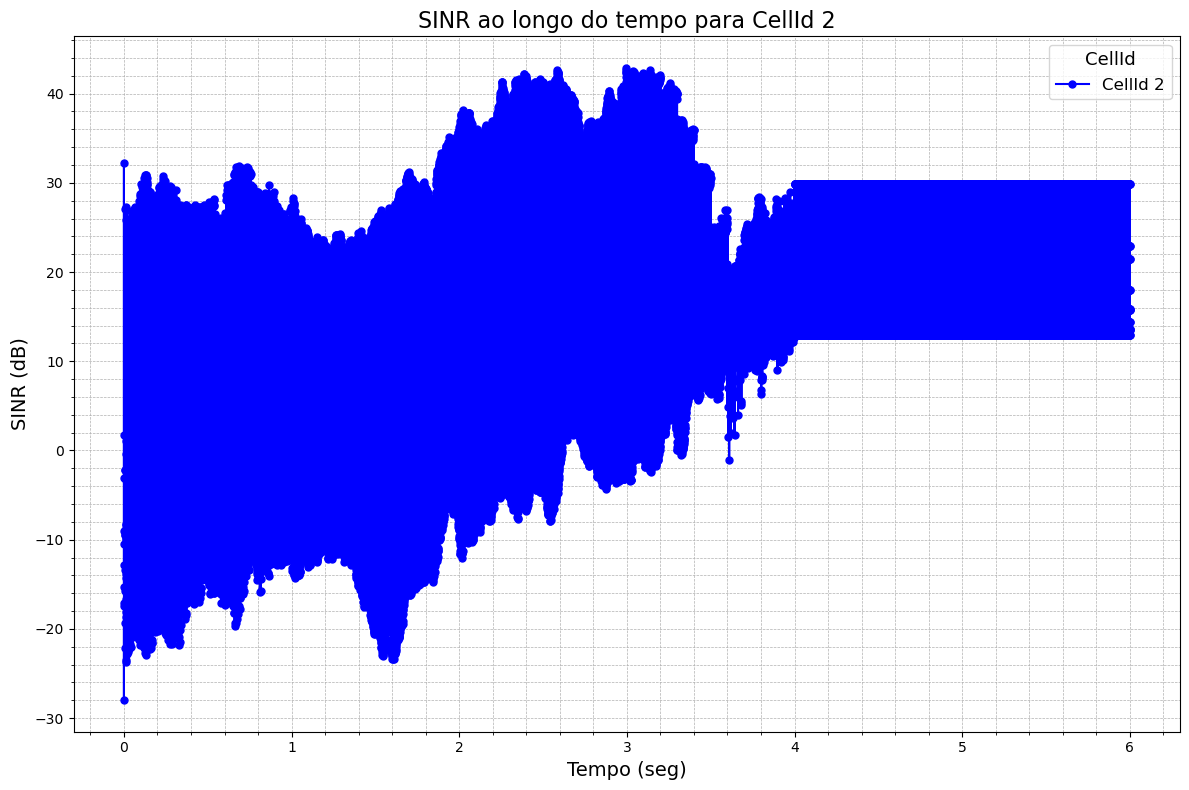

In [ ]:
#%%

# Gráficos separados para cada CellId
for i, CellId in enumerate(CellId_values):
    plt.figure(figsize=(12, 8))
    user_df = filtered_dfs[CellId]
    plt.plot(user_df['Time'], user_df['SINR(dB)'], label=f'CellId {CellId}', color=colors[i % len(colors)], marker=markers[i % len(markers)], linestyle=linestyles[i % len(linestyles)], markersize=5, linewidth=1.5)
    
    plt.title(f'SINR ao longo do tempo para CellId {CellId}', fontsize=16)
    plt.xlabel('Tempo (seg)', fontsize=14)
    plt.ylabel('SINR (dB)', fontsize=14)
    plt.legend(title='CellId', fontsize=12, title_fontsize='13')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.tight_layout()
    plt.show()

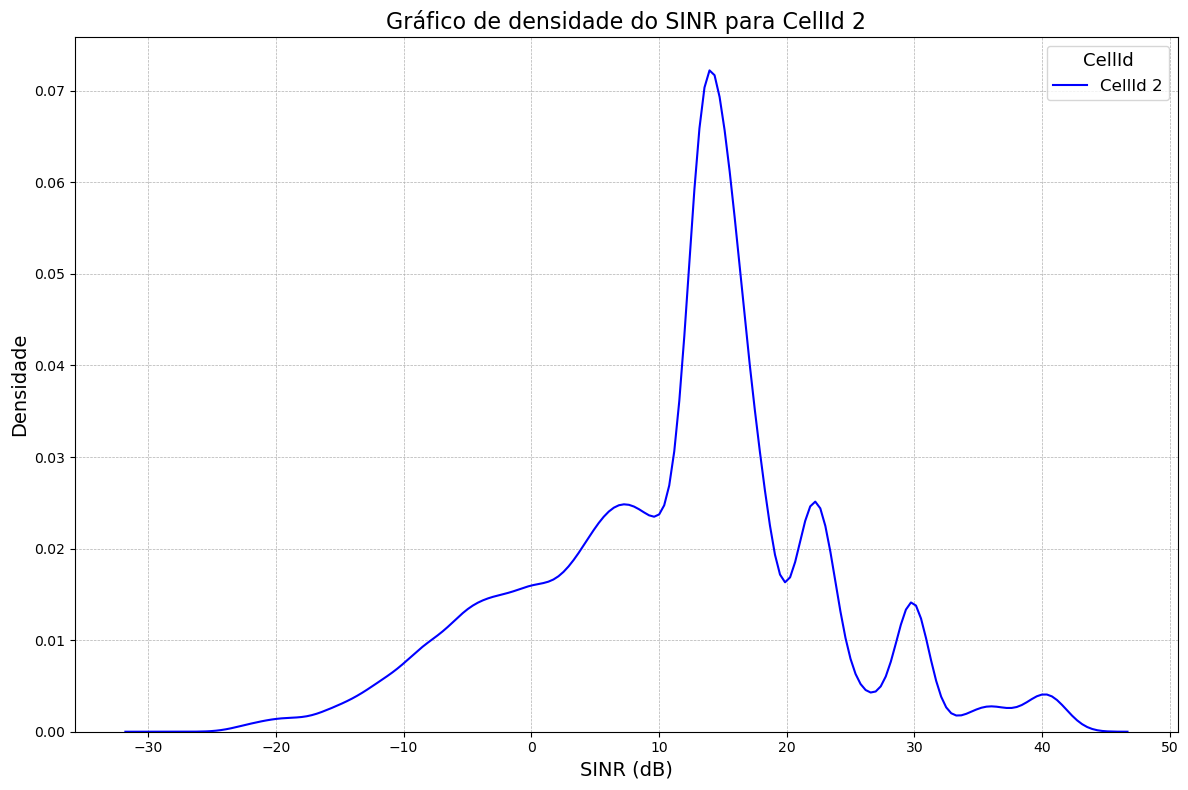

In [ ]:
#%%

# Gráfico de densidade para cada CellId
for i, CellId in enumerate(CellId_values):
    plt.figure(figsize=(12, 8))
    user_df = filtered_dfs[CellId]
    sns.kdeplot(user_df['SINR(dB)'], label=f'CellId {CellId}', color=colors[i % len(colors)], linestyle=linestyles[i % len(linestyles)], linewidth=1.5)
    
    plt.title(f'Gráfico de densidade do SINR para CellId {CellId}', fontsize=16)
    plt.xlabel('SINR (dB)', fontsize=14)
    plt.ylabel('Densidade', fontsize=14)
    plt.legend(title='CellId', fontsize=12, title_fontsize='13')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

TypeError: 'Axes' object is not subscriptable

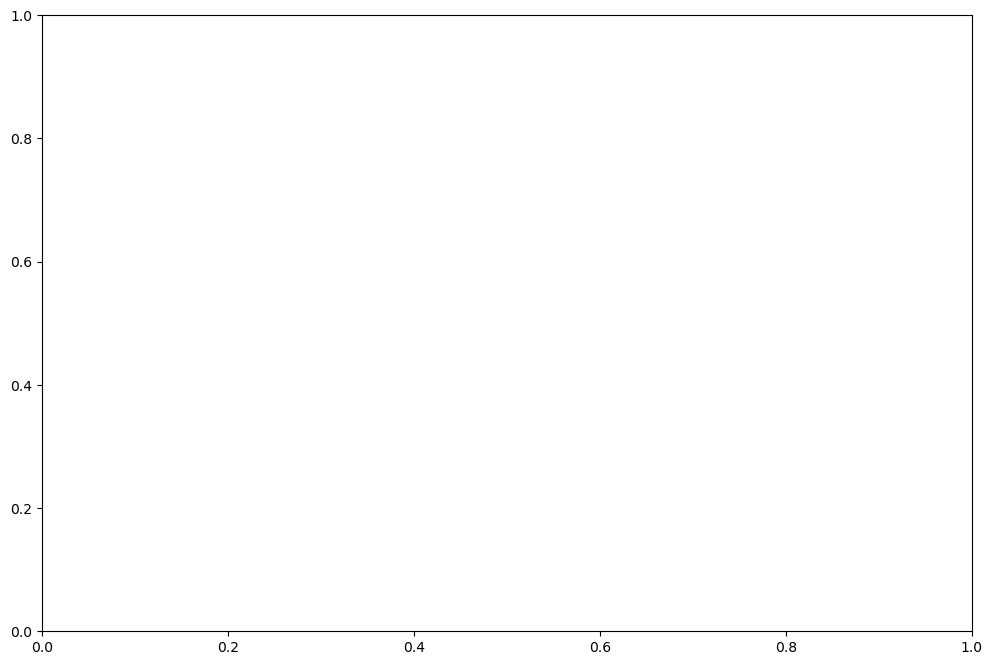

In [ ]:
#%%

# Gráfico de mapa de calor usando seaborn
fig, axs = plt.subplots(len(CellId_values), 1, figsize=(12, 8), sharex=True)

# Plota o gráfico de mapa de calor para cada CellId
for i, CellId in enumerate(CellId_values):
    user_df = filtered_dfs[CellId]
    
    # Remove duplicatas agregando pela média
    user_df = user_df.groupby(['Time', 'CellId'], as_index=False).mean()
    
    pivot_table = user_df.pivot(index="Time", columns="CellId", values="SINR(dB)")
    sns.heatmap(pivot_table, ax=axs[i], cmap="YlGnBu", cbar=True)
    
    axs[i].set_title(f'Mapa de calor do SINR para CellId {CellId}', fontsize=14)
    axs[i].set_ylabel('Tempo (seg)', fontsize=12)

axs[-1].set_xlabel('CellId', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# %%

# Agrupa o DataFrame por CellId e descreve as estatísticas do SINR
grouped_df = df.groupby('CellId')['SINR(dB)'].describe()
grouped_df

: 

In [ ]:
# %%

# Calcula a diferença percentual para cada CellId no início e no final da coluna Time
percentage_diff = {}

# Obtém valores únicos de RNTI
rnti_values = df['RNTI'].unique()

# Calcula a diferença percentual para cada CellId e RNTI
for CellId in CellId_values:
    percentage_diff[CellId] = {}
    for RNTI in rnti_values:
        user_df = filtered_dfs[CellId][filtered_dfs[CellId]['RNTI'] == RNTI]
        if not user_df.empty:
            start_time = user_df['Time'].min()
            end_time = user_df['Time'].max()
            
            start_sinr = user_df[user_df['Time'] == start_time]['SINR(dB)'].values[0]
            end_sinr = user_df[user_df['Time'] == end_time]['SINR(dB)'].values[0]
            
            percentage_diff[CellId][RNTI] = ((end_sinr - start_sinr) / start_sinr) * 100

# Plota a diferença percentual para cada CellId e RNTI
for CellId in CellId_values:
    fig, ax = plt.subplots(figsize=(12, 8))
    rnti_diff = percentage_diff[CellId]
    bars = ax.bar(rnti_diff.keys(), rnti_diff.values(), color=[colors[CellId_values.index(CellId) % len(colors)] for _ in range(len(rnti_diff))], edgecolor='black')
    
    # Adiciona rótulos de valor no topo de cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom' if yval >= 0 else 'top', fontsize=10, color='black')
    
    ax.axhline(0, color='black', linewidth=0.8)  # Adiciona uma linha horizontal em y=0
    ax.set_ylim(min(rnti_diff.values()) - 5, max(rnti_diff.values()) + 5)  # Ajusta os limites do eixo y com uma margem
    ax.set_title(f'Diferença percentual no SINR para CellId {CellId}', fontsize=14)
    ax.set_ylabel('Diferença percentual (%)', fontsize=12)
    ax.set_xlabel('RNTI', fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, axis='y')
    ax.set_xticks(list(rnti_diff.keys()))
    ax.set_xticklabels([int(rnti) for rnti in rnti_diff.keys()], fontsize=12)
    plt.tight_layout()
    plt.show()

: 

TypeError: 'Axes' object is not subscriptable

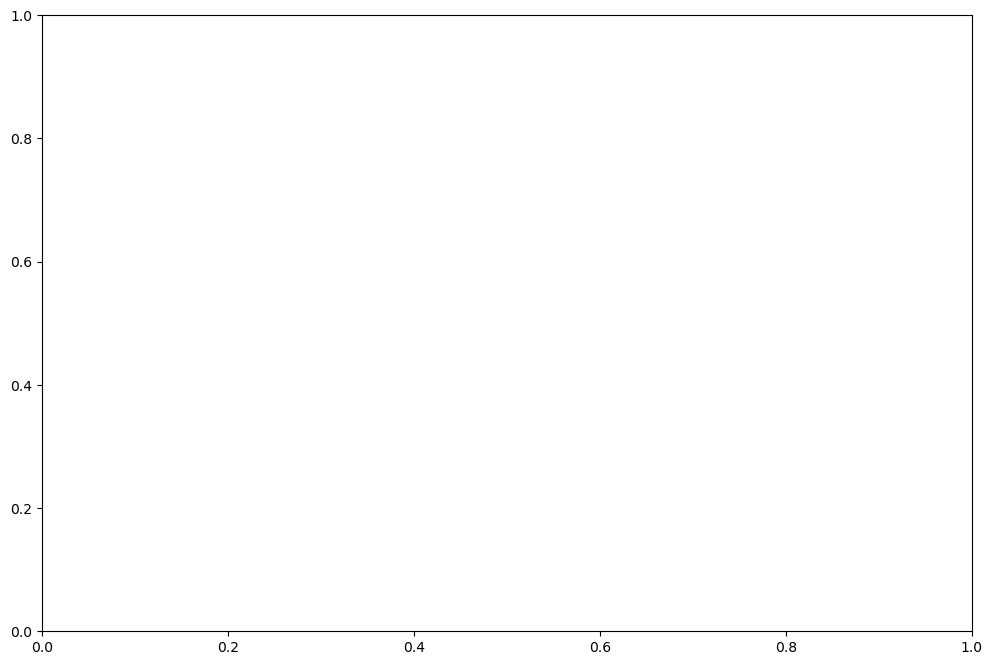

In [ ]:
#%%

# Gráfico de mapa de calor usando seaborn
fig, axs = plt.subplots(len(CellId_values), 1, figsize=(12, 8), sharex=True)

# Plota o gráfico de mapa de calor para cada CellId
for i, CellId in enumerate(CellId_values):
    user_df = filtered_dfs[CellId]
    
    # Remove duplicatas agregando pela média
    user_df = user_df.groupby(['Time', 'CellId'], as_index=False).mean()
    
    pivot_table = user_df.pivot(index="Time", columns="CellId", values="SINR(dB)")
    sns.heatmap(pivot_table, ax=axs[i], cmap="YlGnBu", cbar=True)
    
    axs[i].set_title(f'Mapa de calor do SINR para CellId {CellId}', fontsize=14)
    axs[i].set_ylabel('Tempo (seg)', fontsize=12)

axs[-1].set_xlabel('CellId', fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# %%

# Agrupa o DataFrame por CellId e descreve as estatísticas do SINR
grouped_df = df.groupby('CellId')['SINR(dB)'].describe()
grouped_df

count       mean        std      min      25%      50%      75%  \
CellId                                                                      
2       52880.0  11.463932  11.143618 -27.9785  4.86831  13.5307  17.1419   

            max  
CellId           
2       42.8789

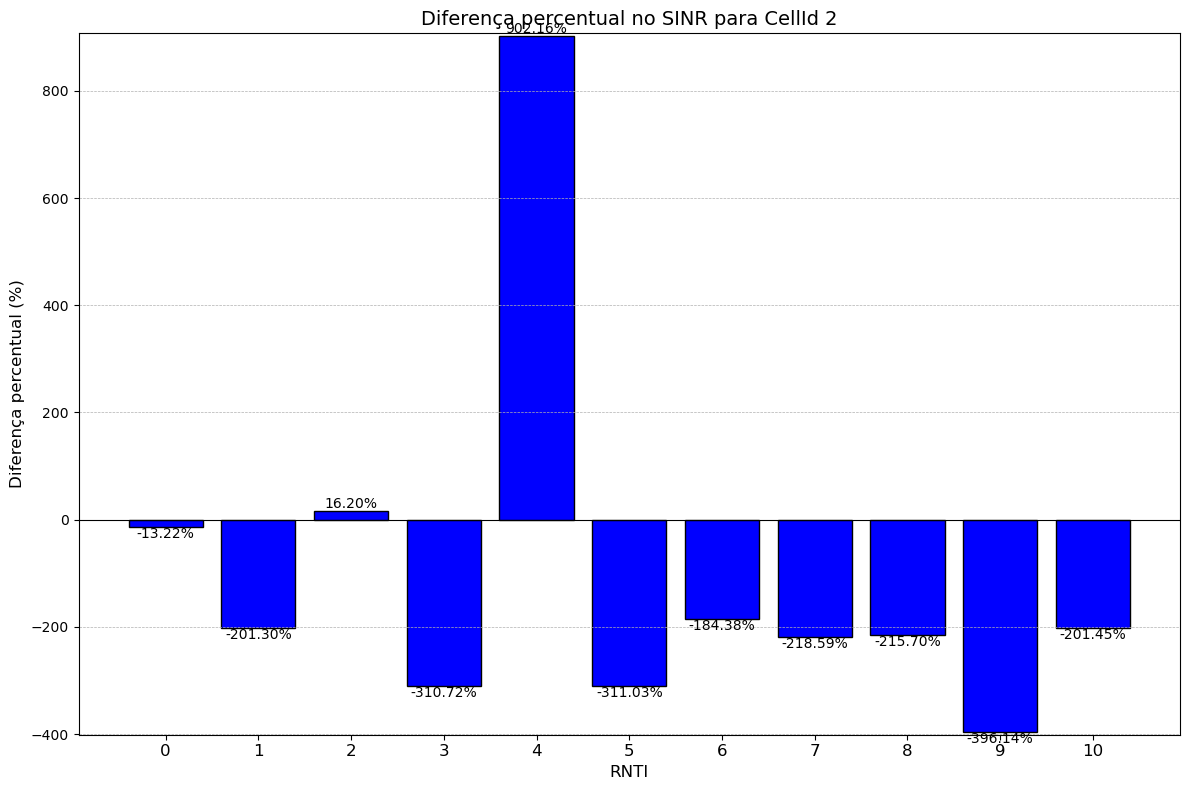

In [ ]:
# %%

# Calcula a diferença percentual para cada CellId no início e no final da coluna Time
percentage_diff = {}

# Obtém valores únicos de RNTI
rnti_values = df['RNTI'].unique()

# Calcula a diferença percentual para cada CellId e RNTI
for CellId in CellId_values:
    percentage_diff[CellId] = {}
    for RNTI in rnti_values:
        user_df = filtered_dfs[CellId][filtered_dfs[CellId]['RNTI'] == RNTI]
        if not user_df.empty:
            start_time = user_df['Time'].min()
            end_time = user_df['Time'].max()
            
            start_sinr = user_df[user_df['Time'] == start_time]['SINR(dB)'].values[0]
            end_sinr = user_df[user_df['Time'] == end_time]['SINR(dB)'].values[0]
            
            percentage_diff[CellId][RNTI] = ((end_sinr - start_sinr) / start_sinr) * 100

# Plota a diferença percentual para cada CellId e RNTI
for CellId in CellId_values:
    fig, ax = plt.subplots(figsize=(12, 8))
    rnti_diff = percentage_diff[CellId]
    bars = ax.bar(rnti_diff.keys(), rnti_diff.values(), color=[colors[CellId_values.index(CellId) % len(colors)] for _ in range(len(rnti_diff))], edgecolor='black')
    
    # Adiciona rótulos de valor no topo de cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom' if yval >= 0 else 'top', fontsize=10, color='black')
    
    ax.axhline(0, color='black', linewidth=0.8)  # Adiciona uma linha horizontal em y=0
    ax.set_ylim(min(rnti_diff.values()) - 5, max(rnti_diff.values()) + 5)  # Ajusta os limites do eixo y com uma margem
    ax.set_title(f'Diferença percentual no SINR para CellId {CellId}', fontsize=14)
    ax.set_ylabel('Diferença percentual (%)', fontsize=12)
    ax.set_xlabel('RNTI', fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, axis='y')
    ax.set_xticks(list(rnti_diff.keys()))
    ax.set_xticklabels([int(rnti) for rnti in rnti_diff.keys()], fontsize=12)
    plt.tight_layout()
    plt.show()

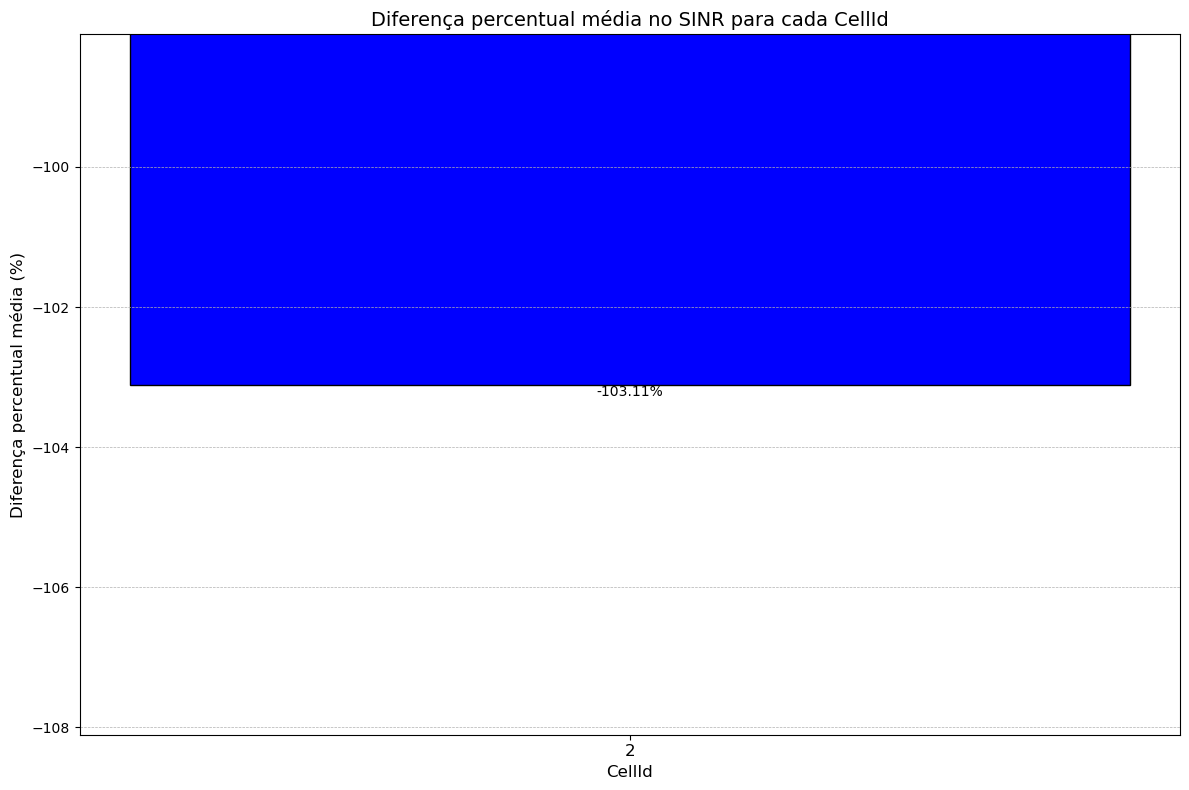

In [ ]:
# %%

# Calcula a diferença percentual média para cada CellId
average_percentage_diff = {CellId: np.mean(list(rnti_diff.values())) for CellId, rnti_diff in percentage_diff.items()}

# Plota a diferença percentual média para cada CellId
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(average_percentage_diff.keys(), average_percentage_diff.values(), color=[colors[CellId_values.index(CellId) % len(colors)] for CellId in average_percentage_diff.keys()], edgecolor='black')

# Adiciona rótulos de valor no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom' if yval >= 0 else 'top', fontsize=10, color='black')

ax.axhline(0, color='black', linewidth=0.8)  # Adiciona uma linha horizontal em y=0
ax.set_ylim(min(average_percentage_diff.values()) - 5, max(average_percentage_diff.values()) + 5)  # Ajusta os limites do eixo y com uma margem
ax.set_title('Diferença percentual média no SINR para cada CellId', fontsize=14)
ax.set_ylabel('Diferença percentual média (%)', fontsize=12)
ax.set_xlabel('CellId', fontsize=12)
ax.grid(True, linestyle='--', linewidth=0.5, axis='y')
ax.set_xticks(list(average_percentage_diff.keys()))
ax.set_xticklabels([int(cellid) for cellid in average_percentage_diff.keys()], fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
# %%

# Cria um DataFrame para armazenar os valores de tempo inicial e final para cada RNTI e CellId
time_values = []

for CellId in CellId_values:
    for RNTI in rnti_values:
        user_df = filtered_dfs[CellId][filtered_dfs[CellId]['RNTI'] == RNTI]
        if not user_df.empty:
            start_time = user_df['Time'].min()
            end_time = user_df['Time'].max()
            start_sinr = user_df[user_df['Time'] == start_time]['SINR(dB)'].values[0]
            end_sinr = user_df[user_df['Time'] == end_time]['SINR(dB)'].values[0]
            time_values.append({'CellId': CellId, 'RNTI': RNTI, 'Start Time': start_time, 'End Time': end_time, 'Start SINR': start_sinr, 'End SINR': end_sinr})

time_df = pd.DataFrame(time_values)
time_df

CellId  RNTI  Start Time  End Time  Start SINR  End SINR
0        2     0    0.000071  0.020071   -17.04800  -14.7942
1        2    10    0.025071  5.999070   -14.19070   14.3968
2        2     9    0.025071  5.999070    -4.60989   13.6515
3        2     8    0.025071  5.999070   -11.14400   12.8933
4        2     7    0.025071  5.999070   -13.39880   15.8899
5        2     6    0.025071  5.999070   -18.67750   15.7606
6        2     5    0.025071  5.999070    -8.51434   17.9674
7        2     4    0.025071  5.999070     2.13710   21.4171
8        2     3    0.025071  5.999070    -6.42114   13.5307
9        2     2    0.025071  5.999070    25.70400   29.8685
10       2     1    0.025071  5.999070   -22.57660   22.8702

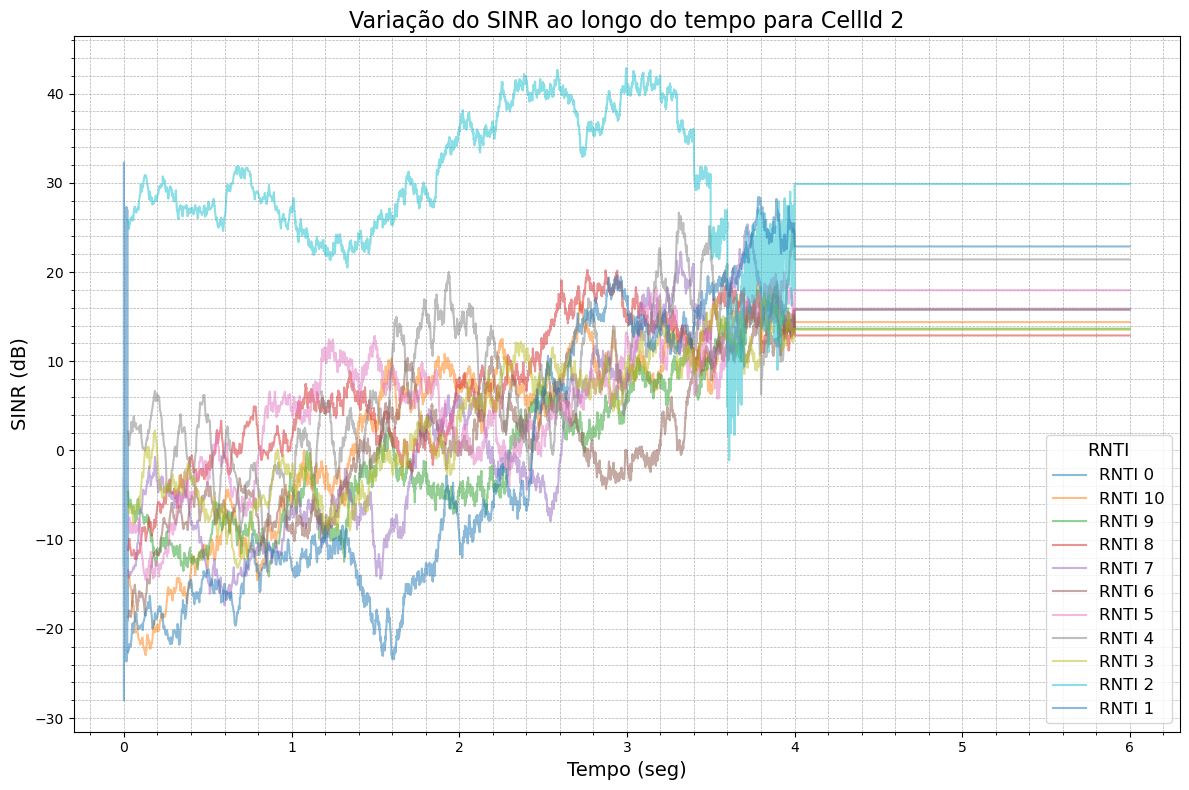

In [ ]:
#%%

# Plota a variação do SINR ao longo do tempo para cada RNTI, separado por CellId
for CellId in CellId_values:
    plt.figure(figsize=(12, 8))
    for RNTI in rnti_values:
        user_df = filtered_dfs[CellId][filtered_dfs[CellId]['RNTI'] == RNTI]
        if not user_df.empty:
            plt.plot(user_df['Time'], user_df['SINR(dB)'], label=f'RNTI {RNTI}', linestyle='-', linewidth=1.5, alpha=0.5)  # Define alpha para 0.5 para translucidez
    
    plt.title(f'Variação do SINR ao longo do tempo para CellId {CellId}', fontsize=16)
    plt.xlabel('Tempo (seg)', fontsize=14)
    plt.ylabel('SINR (dB)', fontsize=14)
    plt.legend(title='RNTI', fontsize=12, title_fontsize='13')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.tight_layout()
    plt.show()

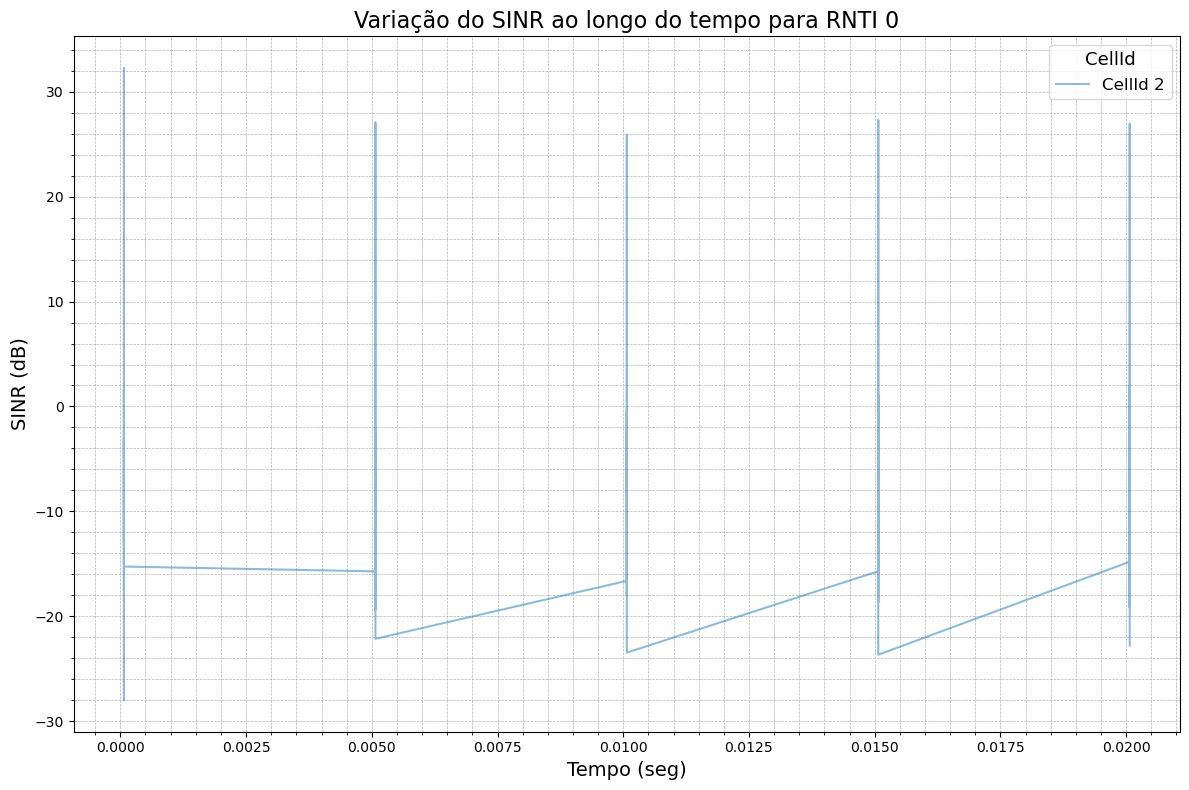

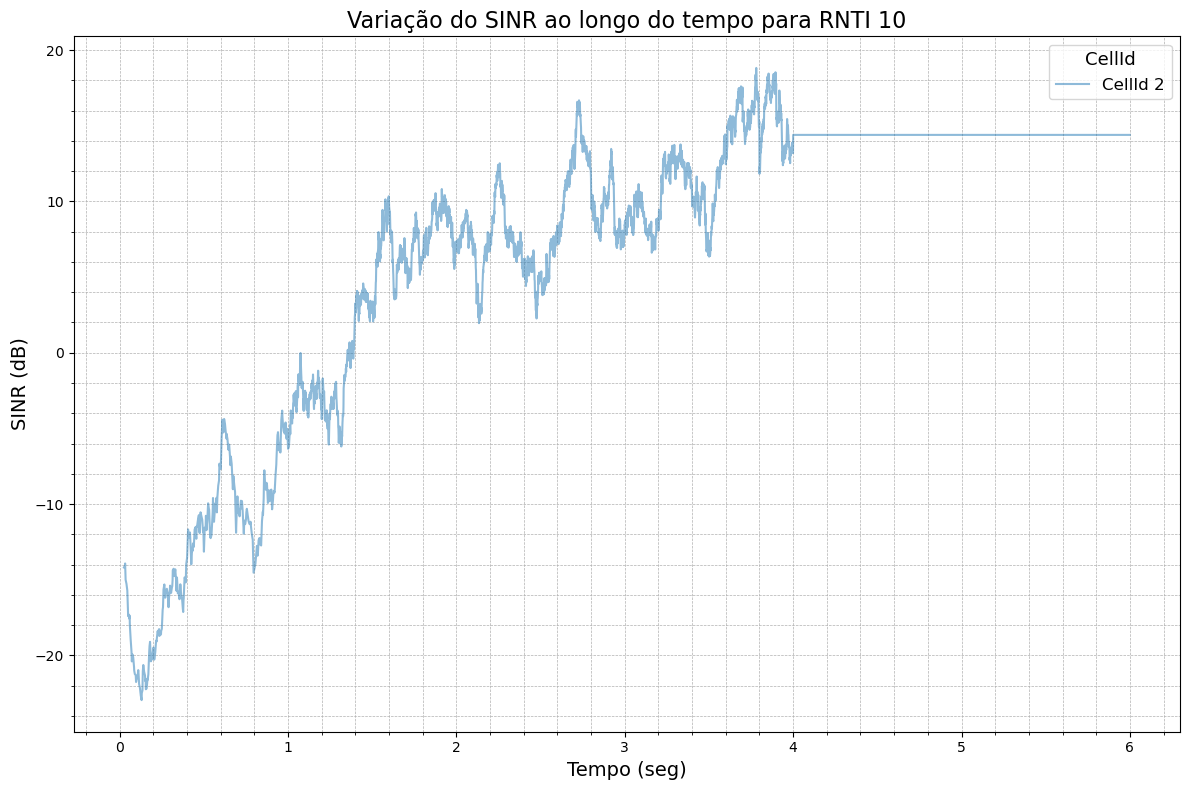

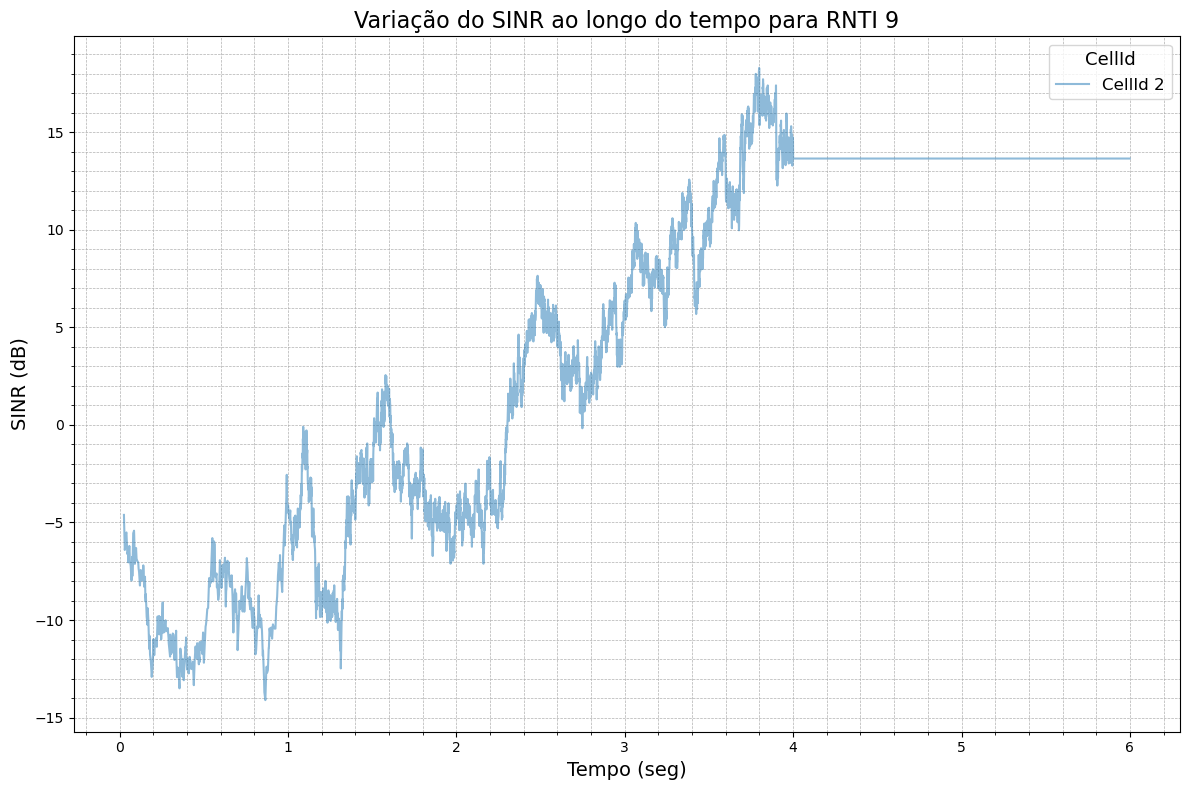

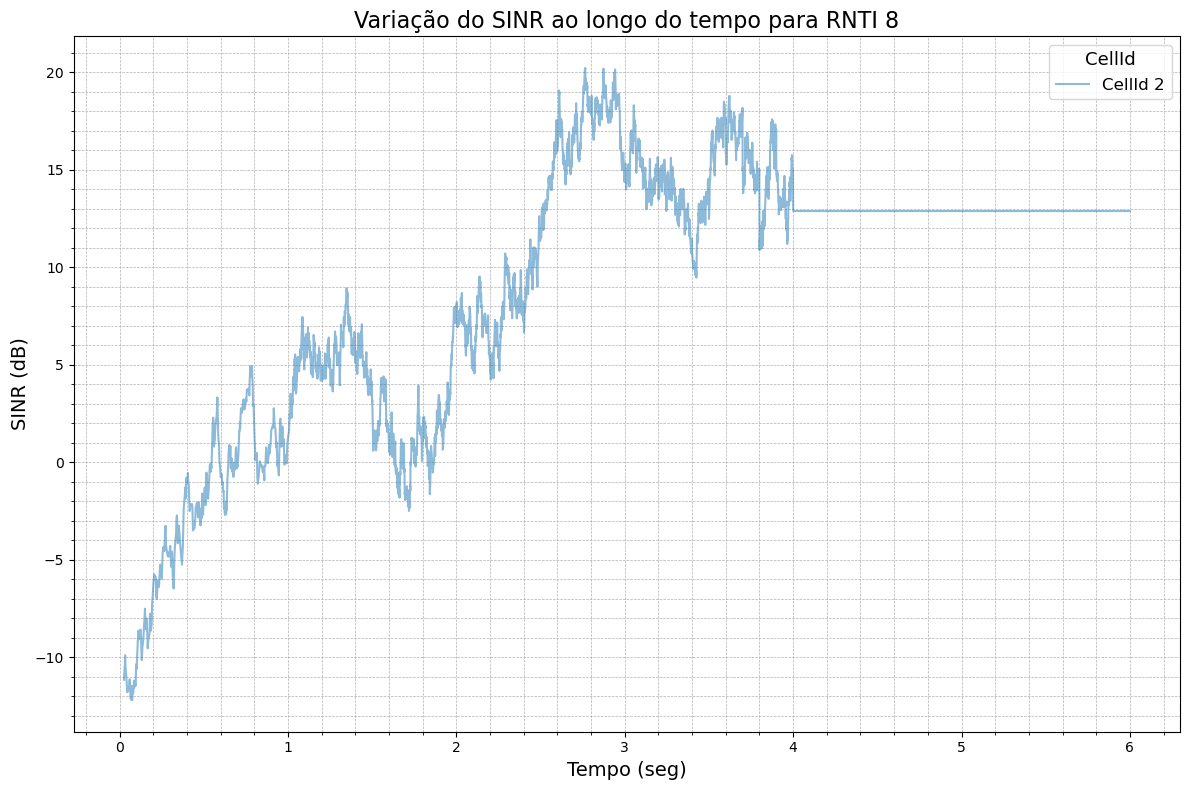

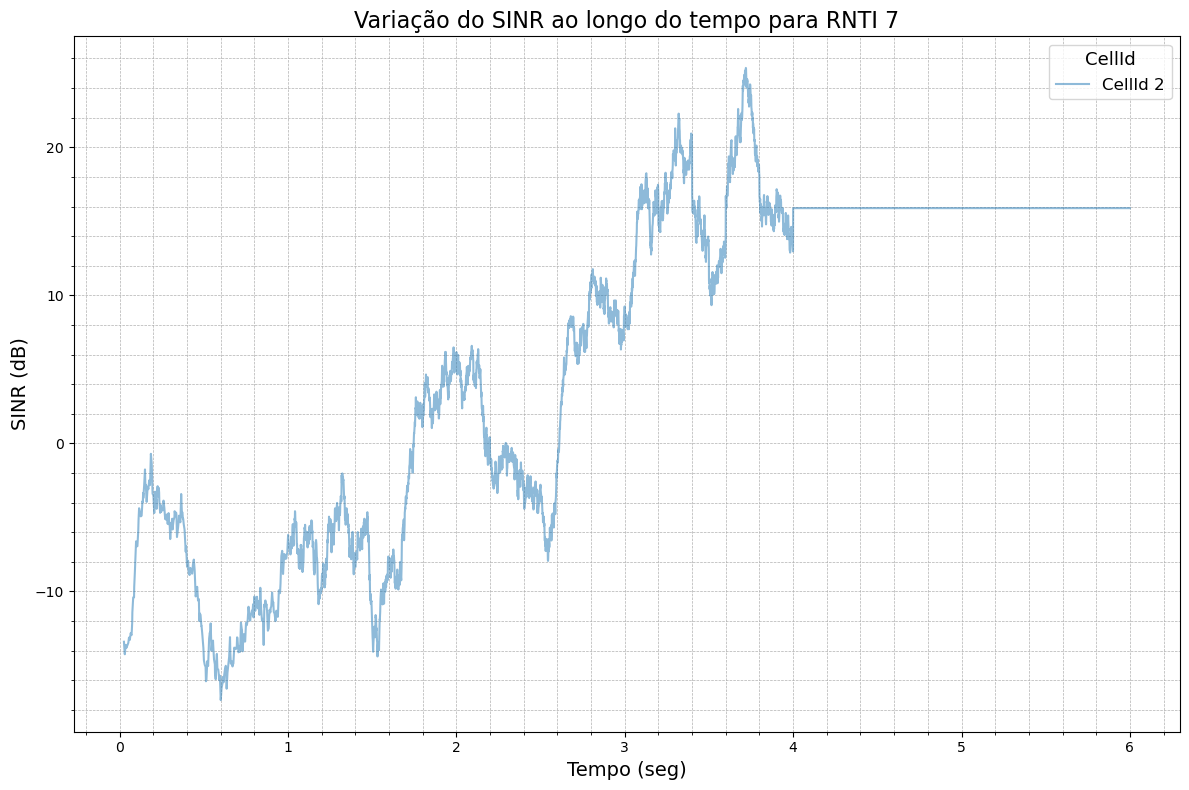

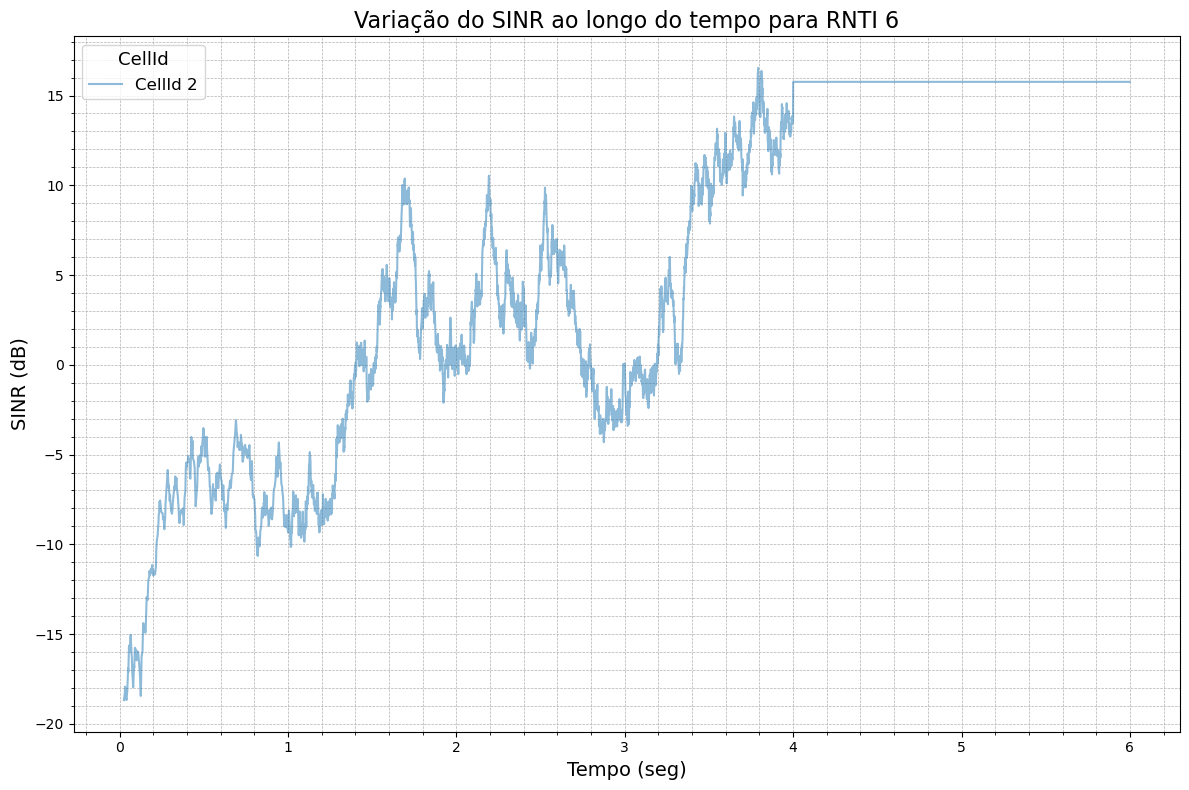

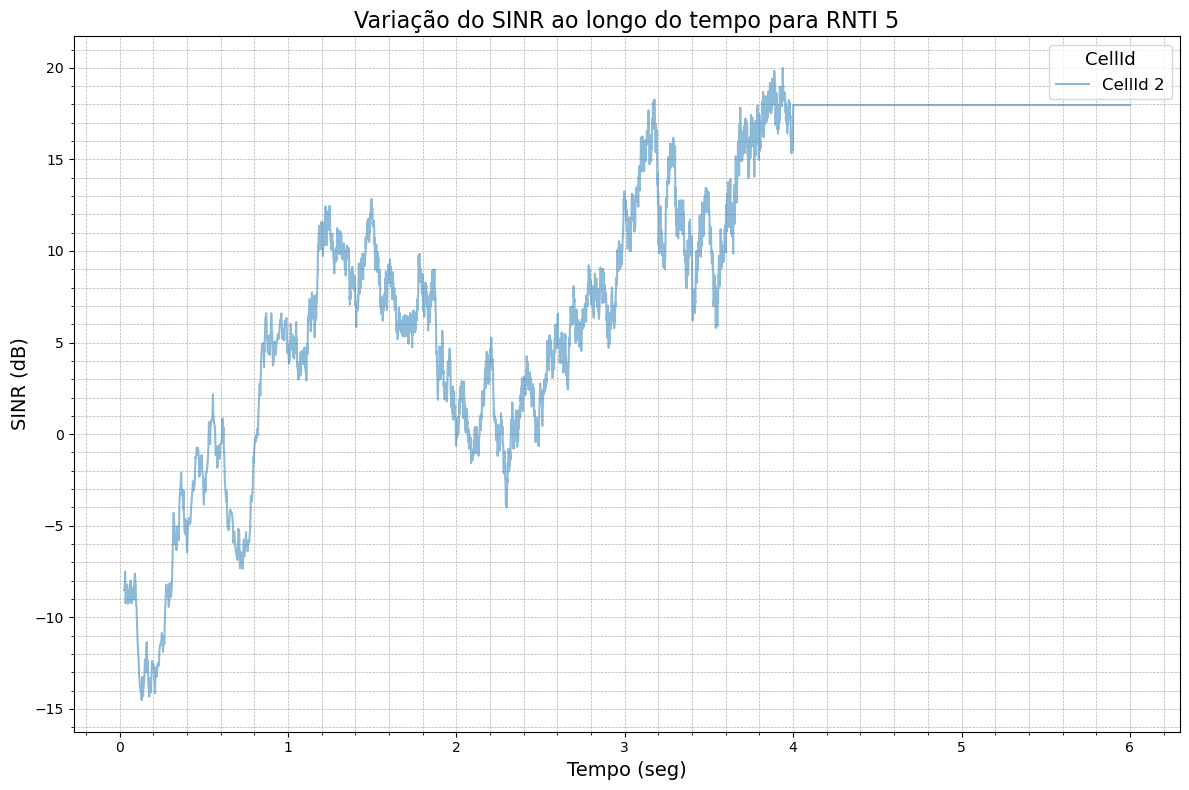

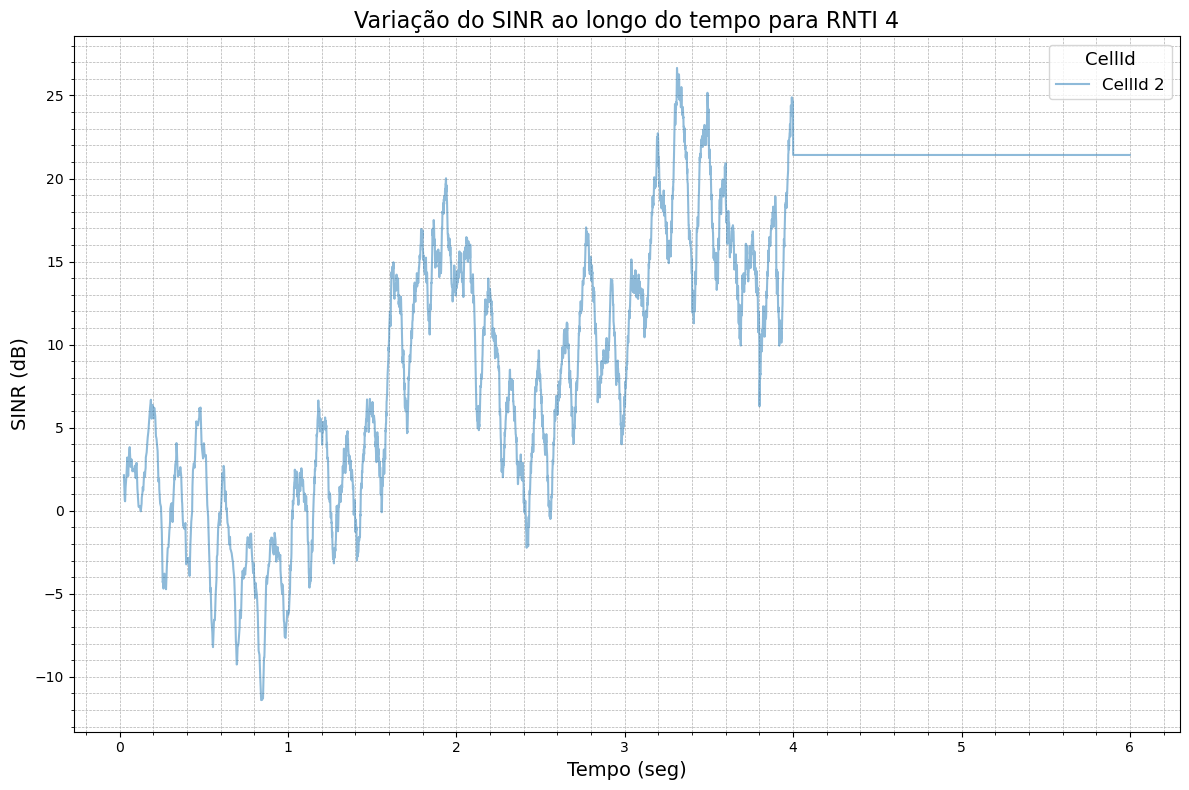

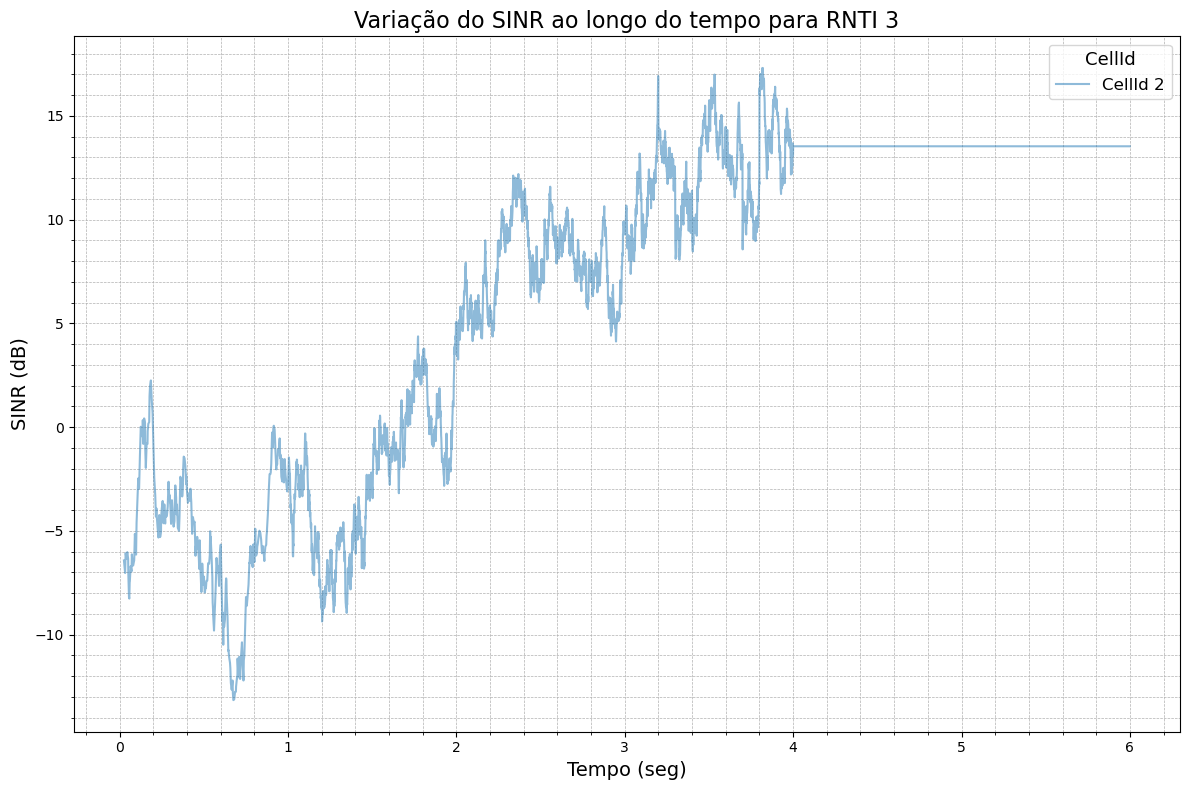

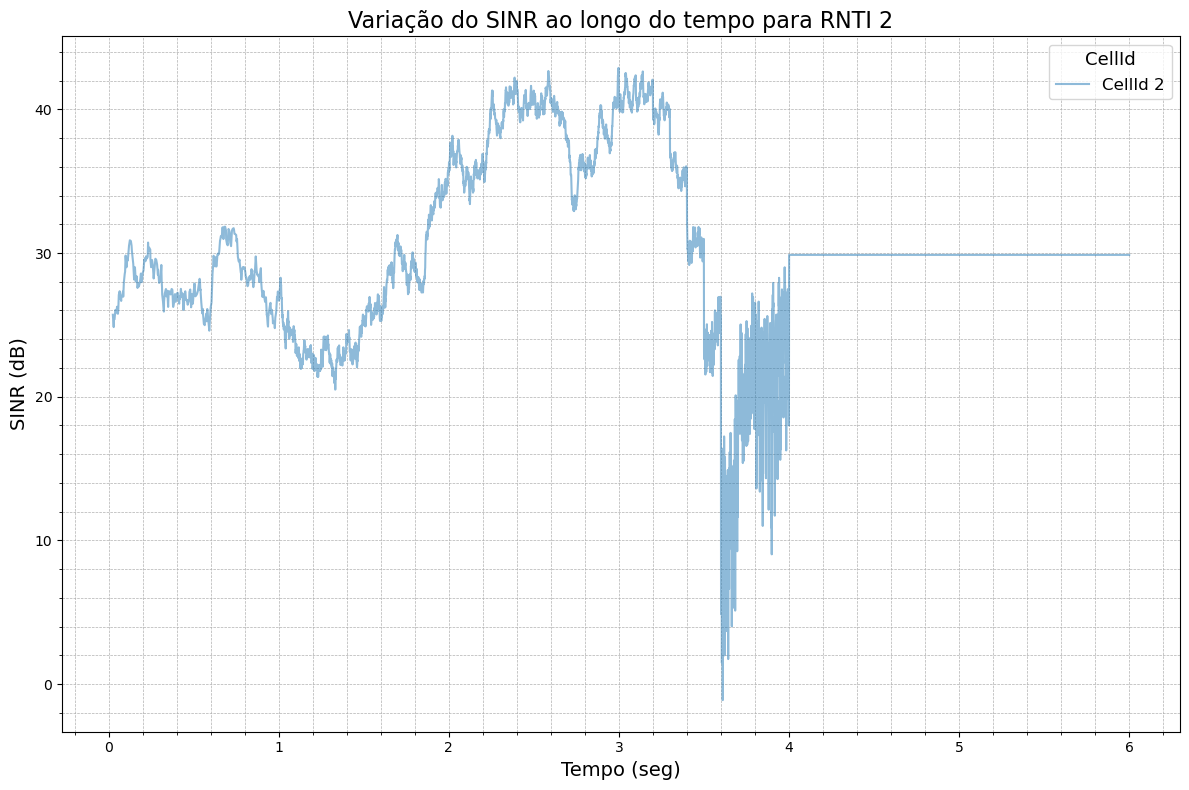

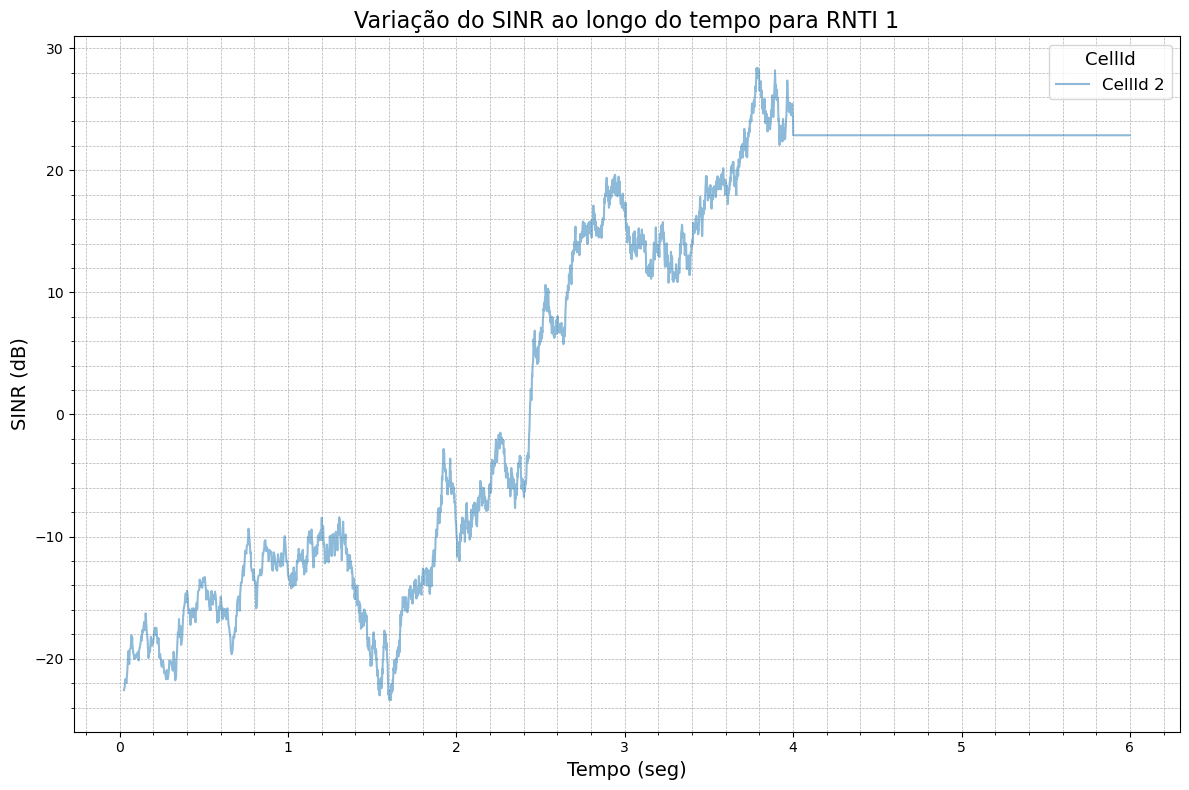

In [ ]:
# %%

# Plota a variação do SINR ao longo do tempo para cada RNTI, mostrando diferenças por CellId
for RNTI in rnti_values:
    plt.figure(figsize=(12, 8))
    for CellId in CellId_values:
        user_df = filtered_dfs[CellId][filtered_dfs[CellId]['RNTI'] == RNTI]
        if not user_df.empty:
            plt.plot(user_df['Time'], user_df['SINR(dB)'], label=f'CellId {CellId}', linestyle='-', linewidth=1.5, alpha=0.5)  # Define alpha para 0.5 para translucidez
    
    plt.title(f'Variação do SINR ao longo do tempo para RNTI {RNTI}', fontsize=16)
    plt.xlabel('Tempo (seg)', fontsize=14)
    plt.ylabel('SINR (dB)', fontsize=14)
    plt.legend(title='CellId', fontsize=12, title_fontsize='13')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.minorticks_on()
    plt.tight_layout()
    plt.show()

In [ ]:
# %%

# Conta a quantidade de ocorrências de cada RNTI
df['RNTI'].value_counts()

RNTI
10    5283
9     5283
8     5283
7     5283
6     5283
5     5283
4     5283
3     5283
2     5283
1     5283
0       50
Name: count, dtype: int64